Deux pages :
<ul>
    <li>Cours-exemple : <strong><a href="https://www.parisnanterre.fr/medias/fichier/chap2_2010_1270559035239.pdf" style="color:red" target="_blank">https://www.parisnanterre.fr/medias/fichier/chap2_2010_1270559035239.pdf</a></strong></li>
    <li>Avec python : <strong><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html" style="color:red" target="_blank">https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html</a></strong></li>
</ul>

### Lecture de la table de données

In [1]:
import pandas as pa
from scipy.stats import *
import pylab as pl

T = pa.read_excel('resultats.xlsx', header = 1)
T

,Anonymisation,GROUPE,(BV5/BV20)*(TBV/ROI) peripheral region both lungs M0,(BV5/BV20)*(TBV/ROI) peripheral region both lungs M6,(BV5/BV20)*(TBV/ROI) peripheral region both lungs M12
0,001-0001-D-A,1,98.3363,156.1050,143.8530
1,001-0004-D-A,1,107.1170,106.2280,107.5150
2,001-0006-A-M,1,100.4930,89.9563,84.1653
3,001-0005-B-B,1,88.8971,119.8140,105.5830
4,001-0007-B-M,1,NaN,92.8805,80.5198
5,001-0009-F-S,1,82.5293,81.1734,107.7880
6,001-0012-C-L,1,80.1548,96.5162,102.4870
7,001-0014-A-L,1,106.7170,93.0500,89.3801
8,001-0016-O-A,1,104.5020,95.3752,95.0138
9,001-0017-R-M,1,102.6770,99.2077,92.6747


### Exclusion de la ligne du patient n°4

In [2]:
T.groupby('GROUPE').mean()

,(BV5/BV20)*(TBV/ROI) peripheral region both lungs M0,(BV5/BV20)*(TBV/ROI) peripheral region both lungs M6,(BV5/BV20)*(TBV/ROI) peripheral region both lungs M12
GROUPE,,,
1,105.447587,100.848253,101.292729
2,105.409075,97.704425,94.840000


### Table sans le patient n°4 + data visualisation

In [3]:
T = T.dropna()
T.columns = ['Anonymisation', 'GROUPE', 'M0', 'M6', 'M12']

In [4]:
T.groupby('GROUPE').mean()

,M0,M6,M12
GROUPE,,,
1,105.447587,101.346238,102.591037
2,105.409075,97.704425,94.840000


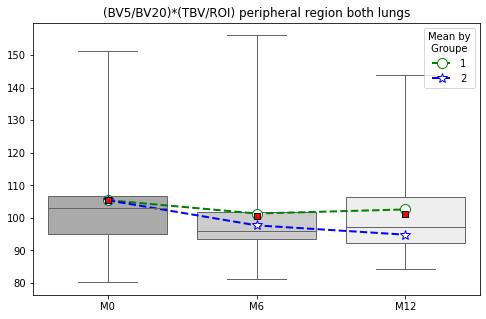

In [5]:
import seaborn as sn

fig, ax = pl.subplots(figsize = (8, 5))
sn.boxplot(data = T[['M0', 'M6', 'M12']],
           palette = ['#AAA', '#CCC', '#EEE'],
           showmeans = True, 
           whis = [0, 100],
           linewidth = 1,
           meanprops = {'marker' : 's',
                        'markerfacecolor' : 'red',
                        'markeredgecolor' : 'black'},
           ax = ax
          )

T.groupby('GROUPE').mean().T.plot(ax = ax, 
                                  color = ['green', 'blue'], 
                                  style = ['o--','*--'],
                                  markerfacecolor = 'white',
                                  markersize = 10,
                                  linewidth = 2,
                                 )

ax.legend(loc = 'upper right', title = 'Mean by\n Groupe')
pl.title('(BV5/BV20)*(TBV/ROI) peripheral region both lungs')
pl.savefig('boxplot.png')
pl.show()

In [6]:
from scipy.stats import mannwhitneyu, shapiro

M = T.groupby('GROUPE').mean().T
mannwhitneyu(M[1], M[2], alternative = 'greater')

MannwhitneyuResult(statistic=7.0, pvalue=0.2)

### Test de normalité ?

In [7]:
shapiro(T.query('GROUPE == 1')['M12'])

ShapiroResult(statistic=0.8737702369689941, pvalue=0.0310729518532753)

### Test unilatéral  

In [8]:
for c in ['M0', 'M6',  'M12']:
    u, pvalue =mannwhitneyu(T.query('GROUPE == 1')[c], 
                            T.query('GROUPE == 2')[c], 
                            alternative = 'greater',
                            method = 'exact'
                           )
    print(pvalue)

0.3752321981424149
0.21857585139318889
0.1450980392156863


### Test bilatéral  

In [9]:
for c in ['M0', 'M6',  'M12']:
    u, pvalue =mannwhitneyu(T.query('GROUPE == 1')[c], 
                            T.query('GROUPE == 2')[c], 
                            alternative = 'two-sided',
                            method = 'exact'
                           )
    print(pvalue)

0.7504643962848297
0.43715170278637777
0.2901960784313726


In [10]:
for c in ['M0', 'M6',  'M12']:
    u, pvalue =mannwhitneyu(T.query('GROUPE == 1')[c], 
                            T.query('GROUPE == 2')[c], 
                            alternative = 'less',
                            method = 'exact'
                           )
    print(pvalue)

0.6590299277605779
0.8076367389060887
0.8757481940144477
